 Implement image style transfer, transforming a given content image to 
adopt the artistic style of another image, using “Arbitrary Image Stylization '' 
model from TensorFlow Hub.
 Tools: tensor flow and cv2 library
 Procedure:
 1. Load a STYLE IMAGE and a content Image.
 2. Use tensor flow and cv2 library
 3. Resizing the style image
 4. Apply the Arbitrary Image Stylization'' model from TensorFlow Hub
 5. Display the output image

In [2]:
# pip install tensorflow
# pip install tensorflow
!pip install tensorflow_hub

  Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl (30 kB)


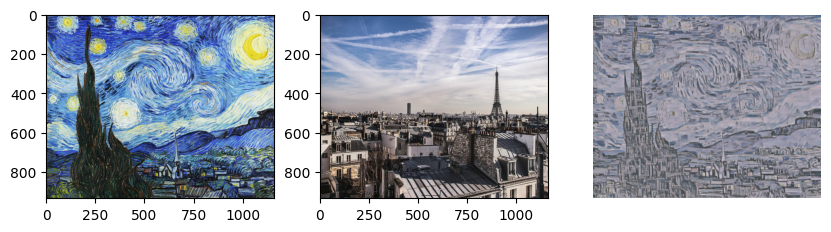

In [8]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

# Load and preprocess images
def load_img(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img[tf.newaxis, :]

content_img = load_img('content.jpg')
style_img = load_img('style.jpg')
style_img = tf.image.resize(style_img, content_img.shape[1:3])

# Style transfer
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_img = model(content_img, style_img)[0]

# Display
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1).imshow(content_img[0])
plt.subplot(1, 3, 2).imshow(style_img[0])
plt.subplot(1, 3, 3).imshow(stylized_img.numpy().squeeze(0))
plt.axis('off')
plt.show()